# Weekly Assignment 02 

In order to find the mean of steps per participants, we start by combining both dataframes into a master

In [508]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr 

df_steps = pd.read_csv("steps.csv", sep = ";")
df_survey = pd.read_csv("survey.csv")
df_steps = df_steps.fillna(0)
df_survey = df_survey.fillna(0)
df = pd.merge(df_steps, df_survey, on = "id")

In [509]:
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,0.0,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,0.0,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,0.0,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [510]:
# calculating mean of steps oer participant and store it in a variable
mean_steps = df.loc[:,"20-6-2013":"13-5-2014"].mean(axis = 1)
mean_steps

0      5133.875000
1      2826.371951
2      3745.902439
3       221.536585
4       874.557927
          ...     
924    1742.908537
925     731.689024
926    6268.954268
927    3872.115854
928    3167.902439
Length: 929, dtype: float64

In [511]:
# create a new pandas Dataframe out of the variable
df_set = pd.DataFrame(mean_steps)
# changing the name of the column
df_set = df_set.rename(columns = {0 : "mean"})
# creating a new id column based on the index of the dataframe + 1
df_set["id"] = df_set.index +1
# create a new variable cols to rearange columns
cols = df_set.columns.tolist()
# rearanging columns
cols = cols[-1:] + cols[:-1]
df_set = df_set[cols]
# reseting the index
df_set = df_set.reset_index(drop = True)
df_set.head(5)

,id,mean
0,1,5133.875000
1,2,2826.371951
2,3,3745.902439
3,4,221.536585
4,5,874.557927


In [512]:
# joining the master data frame with the new mean dataframe
df = pd.merge(df, df_set, on = "id")
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,5133.875000
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,2826.371951
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,0.0,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,3745.902439
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,221.536585
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,874.557927


In [513]:
# creating a subset dataframe
df_subset = df[["mean", "height", "weight"]]
df_subset

,mean,height,weight
0,5133.875000,178.0,98.0
1,2826.371951,180.0,77.0
2,3745.902439,180.0,83.0
3,221.536585,178.0,80.0
4,874.557927,167.0,61.0
...,...,...,...
924,1742.908537,165.0,59.0
925,731.689024,192.0,90.0
926,6268.954268,181.0,71.0
927,3872.115854,172.0,65.0


# Analysis of mean steps per participant

With first matrix plot, we notice outliers that distorts our view of the distribution. therefor we try to zoom in to get a closer view on the data. 

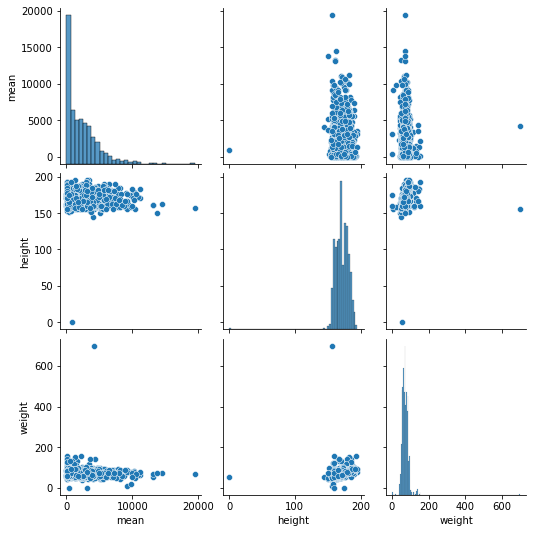

In [514]:
sns.pairplot(df_subset)
plt.show()

In [515]:
# checking unique values to identify anomolies in height dataset
df["height"].unique()

array([178., 180., 167., 170., 175., 165., 172., 169., 162., 176., 158.,
       182., 174., 179., 160., 186., 183., 166., 185., 157., 187., 153.,
       155., 163., 195., 156., 173., 181., 177., 171., 150., 164., 161.,
       190., 168., 184.,   0., 192., 188., 145., 159., 152., 193., 189.,
       151.])

In [516]:
# checking unique values to identify anomolies in weight dataset
df["weight"].unique()

array([ 98.,  77.,  83.,  80.,  61.,  63.,  75.,  88.,  69.,  93.,  60.,
        50.,  68.,  54.,  95.,  73.,  70.,  78., 140.,  72.,  58.,  52.,
        47.,  87.,  90., 700.,  62.,  85., 120.,  65.,  86.,  81.,  96.,
       133.,  82.,  45.,  64.,  84.,  89.,  53.,  67.,  55.,  76.,  37.,
        97.,  48.,  71.,  56., 105.,  51.,  59., 106.,  79.,  66.,  92.,
        46.,  49.,  94.,  74.,  57., 149., 110.,  99.,   6., 100., 102.,
       155., 116., 128., 115., 101.,  20.,   0.])

while trying to zoom in, we created a plot to analyse mean of steps and be able to determin outliers.

1697.4268292682927


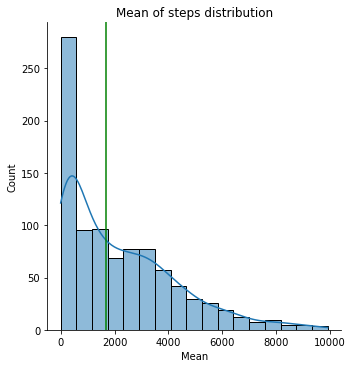

In [529]:
median = df["mean"].median()
print(median)
sns.displot(df_subset["mean"], kde=True) #kde=False means we don't get an overlying density plot
plt.axvline(median, 0, 100, color='green', label='median')
plt.title("Mean of steps distribution")
plt.xlabel("Mean")
plt.ylabel("Count")
plt.show()

after analysis of the three variables, the approach taken was to remove anamolies from hieght and weight variable, and get values close to the median of mean steps. 

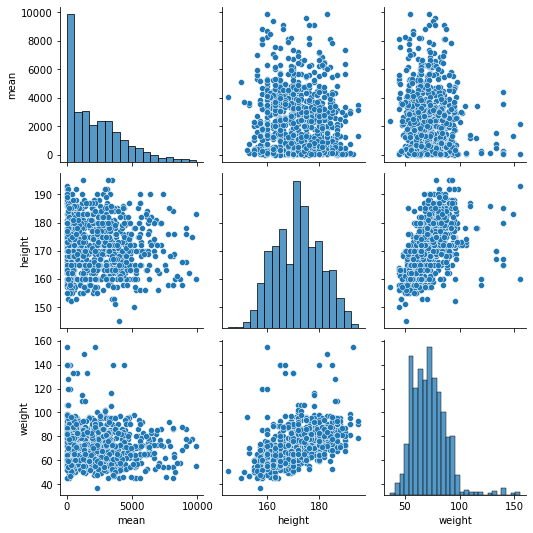

In [530]:
df_subset = df_subset[(df_subset["height"] > 0) & (df_subset["weight"] > 30) & (df_subset["weight"] < 200) & (df_subset["mean"] < 10000) ] 
sns.pairplot(df_subset)
plt.show()

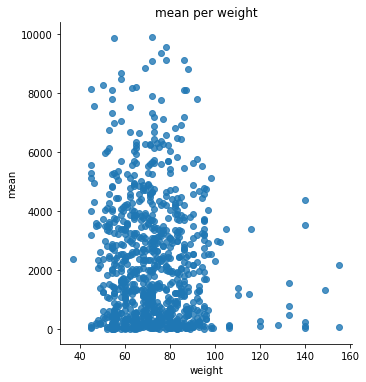

In [531]:
# zoom in on mean per weight
sns.lmplot(x='weight', y='mean', fit_reg=False, data=df_subset)
plt.xlabel('weight') 
plt.ylabel('mean')
plt.title('mean per weight')
plt.show()

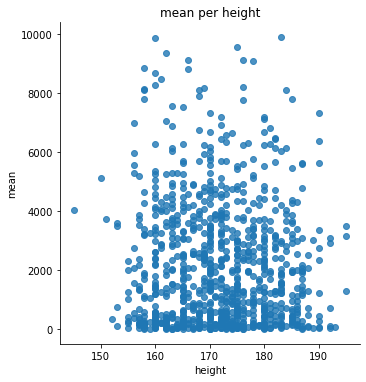

In [532]:
# zoom in on height per weight
sns.lmplot(x='height', y='mean', fit_reg=False, data=df_subset)
plt.xlabel('height') 
plt.ylabel('mean')
plt.title('mean per height')
plt.show()

the analysis of mean as an independant variable, with hieght as the dependand variable done below shows the following:
* height and mean are in a weak negative linear correlation (_r_ = - 0.041)
* The correlation is weakly significant ( 0.1 < _p_ < 0.3)

In [533]:
print(pearsonr(df_subset['mean'],df_subset['height']))

(-0.04100132012397244, 0.21683316225849159)


the analysis of mean as an independant variable, with hieght as the dependand variable done below shows the following:
* weight and mean are in a moderate negative linear correlation (_r_ = - 0.077)
* The correlation is weakly significant ( 0.1 < _p_ < 0.3)

In [534]:
print(pearsonr(df_subset['mean'],df_subset['weight']))

(-0.07766309672753866, 0.019189493315190397)


# Analyzing qualitative and quantitative variables

In [536]:
df_subset = df[["city","gender","mean", "height", "weight"]]
df_subset = df_subset[(df_subset["height"] > 0) & (df_subset["weight"] > 30) & (df_subset["weight"] < 200) & (df_subset["mean"] < 10000) ] 

The analysis below shows that participation of both genders, male and female are close in terms of mean steps. 

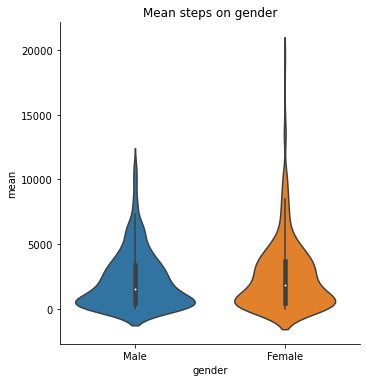

In [537]:
sns.catplot(data = df, x = "gender", y = "mean", kind = "violin")
plt.title('Mean steps on gender')
plt.show()

the distribution of mean steps per participant on city level varies significantly. Bordeaux holds the highest number of activity, succeded by Lile and Montpellier. While Lyon holds the lowest number of steps taken by participants in it.

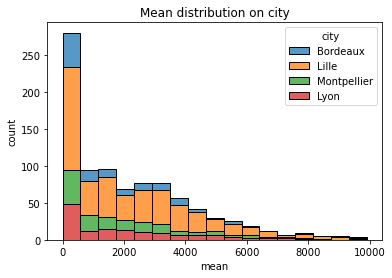

In [538]:
sns.histplot(data = df_subset, x="mean", hue="city", multiple = "stack")
plt.title("Mean distribution on city")
plt.xlabel('mean')
plt.ylabel('count')
plt.show()

# Analyzing quantitative variables

Below we are comparing two qualitative variables, gender and education level

In [539]:
pd.crosstab(df["gender"],df["education_1"])

education_1,Bachelor,High school,Master or doctorate,No degree,Primary,Vocational
gender,,,,,,
Female,185,63,159,0,7,21
Male,172,43,253,1,6,19


In [527]:
pd.crosstab(df["gender"],df["education_1"], normalize="columns")

education_1,Bachelor,High school,Master or doctorate,No degree,Primary,Vocational
gender,,,,,,
Female,0.518207,0.59434,0.385922,0.0,0.538462,0.525
Male,0.481793,0.40566,0.614078,1.0,0.461538,0.475


The analysis shows us the distribution is almost even between males (51.8%) and females (48.2%) in terms of participants. Yet the difference starts to display with education level.
* female participants have high primary, school distribution and bachelor degree higher than males
* males participants on the other hand are higher when it comes to Masters or doctorate category

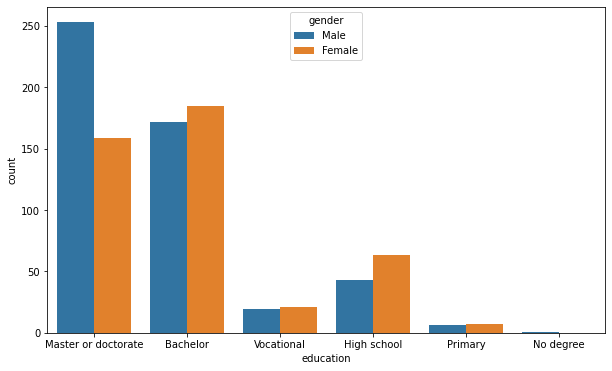

In [540]:
plt.figure(figsize=(10, 6)) #set the figure ("canvas") size
plot = sns.countplot(data = df, x = "education_1", hue = "gender") #create the plot
plt.xlabel("education")
plt.show()